In [122]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
#setting up the parameters
N = 10000 #total number of rounds in which customers connect to the online website
d = 9 # number of strategies

In [124]:
#creating simulation 
conversion_rate=[0.05,0.13,0.09,0.16,0.11,0.04,0.2,0.08,0.01]#placing conversion rates in a list

In [135]:
X = np.array(np.zeros([N,d])) #generating a simulation over 10K rounds. #Using a Bernouli distribution. N is 10K rows, d is 9 columns
# make a for loop to loop over rows, then loop again over the columns
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rate[j]:
            X[i,j] = 1

In [126]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Implementing a Random Strategy and Thompson Sampling

In [152]:
# Implementing a Random Strategy and Thompson Sampling
strategies_selected_rs = [] #list of strategies selected over a round randomly
strategies_selected_ts = [] #thompson sampling strategy
total_reward_rs = 0
total_reward_ts = 0
numbers_of_rewards_1 = [0] *d #the number of times strategy has recieved a one award up until round n
numbers_of_rewards_0 = [0] *d #the number of times a strategy has received a zero award up until round n
# Big for loop!
for n in range(0,N):
    strategy_rs=random.randrange(d) # Random Strategy
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs #total_reward_rs += reward_rs
    strategy_ts = 0 #Thompson Sampling
    max_random = 0 
    for i in range (0, d):#step 1 will loop over all nine strategies
        random_beta = random.betavariate(numbers_of_rewards_1[i] +1,numbers_of_rewards_0[i] +1) #Gives us the random draw from distributions for each of our 9 strategies
        if random_beta >max_random: #if new random beta is larger than the old random beta, update max random to new one
            max_random = random_beta #a more practical way to get max random than making list, getting random betas, using argmax to get maximum
            strategy_ts = i #step 2 get the strategy that has the maximum of random draws
# Step 3 of algorithm 
#get out of the previous for loop, update the number of times strategies have received reward one, reward zero up to round n
#check reward for the strategy, update number for specific strategy selected in step 2, do the same for zero reward
        reward_ts =X[n,strategy_ts] #get this from matrix of rewards created in simulation
#implement 2 conditions to get a number
        if reward_ts == 1:
            numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1 # or numbers_of_rewards_1[strategy_ts] +=1
        else:
            numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1 # numbers_of_rewards_0[strategy_ts] +=1  #only element of list corresponding to strategy selected
        strategies_selected_ts.append(strategy_ts)
        total_reward_ts = total_reward_ts + reward_ts
    

In [153]:
#Computing the Absolute and Relative Return(RR)
#RR is the return an asset (i.e Thompson sampling) achieves over a period of time compared to a benchmark(i.e random strategy)
#By what percentage more does it achieve this?
absolute_return = (total_reward_ts - total_reward_rs) * 100
relative_return = ((total_reward_ts - total_reward_rs) / total_reward_rs) * 100
print("The Absolute Return: {:.0f} $".format(absolute_return))
print("\n")
print("The Relative Return: {:.0f} %".format(relative_return))

The Absolute Return: 1269700 $


The Relative Return: 1274 %


In [154]:
total_reward_rs

997.0

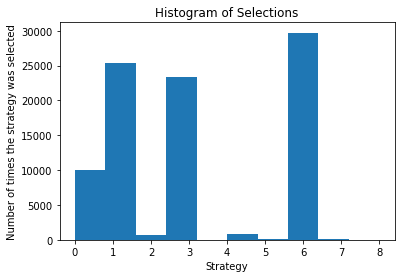

In [155]:
plt.hist(strategies_selected_ts)
plt.title('Histogram of Selections')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show() #note strategy 6 is actually strategy number 7

# Regret Curve of a model

In [ ]:
# BTW Thompson sampling outperforms UCB algorithm as well

# Addendum

In [ ]:
conversion_rate=[0.05,0.13,0.09,0.16,0.11,0.04,0.2,0.08,0.01] # use this to demonstrate that the model works going from left to right